<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Data_cleaning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning data in Python
This notebook contains my notes and exercices solutions from DataCamp DS track. 

## Common Data Problems

Converting data types, applying range constraints to removing future data points, removing duplicated data points to avoid double-counting. 


**Before starting any analysis on the imported data**, it is crucial to **check the data types of the columns**. We do it by using attribute ```.dtype``` or ```.info()``` method.

**Checking data type information in the columns with .info() and .describe()**

* Print the information of ride_sharing.
* Use .describe() to print the summary statistics of the user_type column from ride_sharing.

```
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())
```

```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
duration           25760 non-null object
station_A_id       25760 non-null int64
station_A_name     25760 non-null object
station_B_id       25760 non-null int64
station_B_name     25760 non-null object
bike_id            25760 non-null int64
user_type          25760 non-null int64
user_birth_year    25760 non-null int64
user_gender        25760 non-null object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
```
* By looking at the summary statistics - they don't really seem to offer much description on how users are distributed along their purchase type, why do you think that is?



> The user_type column has an finite set of possible values that represent groupings of data, it should be converted to category.

**Converting data type with .astype attribute and checking the correction with assert statement and .dtype**

* Convert user_type into categorical by assigning it the 'category' data type and store it in the user_type_cat column.
* Make sure you converted user_type_cat correctly by using an assert statement.

```
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())
```




**Numerical values imported as strings instead of floats or ints - converting numerical data to correct data type and deleting unnecessary info with .strip() method**

* Use the .strip() method to strip duration of "minutes" and store it in the duration_trim column.
* Convert duration_trim to int and store it in the duration_time column.
* Write an assert statement that checks if duration_time's data type is now an int.
* Print the average ride duration.

```
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing[['duration','duration_trim','duration_time']].mean())
```

```
        duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
duration_time    11.389053
dtype: float64

<script.py> output:
             duration duration_trim  duration_time
    0      12 minutes           12              12
    1      24 minutes           24              24
    2       8 minutes            8               8
    3       4 minutes            4               4
    4      11 minutes           11              11
    ...           ...           ...            ...
    25755  11 minutes           11              11
    25756  10 minutes           10              10
    25757  14 minutes           14              14
    25758  14 minutes           14              14
    25759  29 minutes           29              29
    
    [25760 rows x 3 columns]
    duration_time    11.389053
    dtype: float64
```



### Data range constraints

**Converting string dtype to integer to range the values and reversing the conversion of dtype - .astype(), .loc[]**

* Convert the tire_sizes column from category to 'int'.
* Use .loc[] to set all values of tire_sizes above 27 to 27.
* Reconvert back tire_sizes to 'category' from int.
* Print the description of the tire_sizes.

```
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())
```

```
count     25760
unique        2
top          27
freq      13274
Name: tire_sizes, dtype: int64
```


**Fixing incorrect dates - converting to datetime object, setting max data range to actual data with dt.date.today()**

* Convert ride_date to a datetime object and store it in ride_dt column using to_datetime().
* Create the variable today, which stores today's date by using the dt.date.today() function.
* For all instances of ride_dt in the future, set them to today's date.
* Print the maximum date in the ride_dt column.

```
import pandas as pd
import datetime as dt

# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())


```

### Uniqueness constraints

**Finding duplicates with .duplicated()**

* Find duplicated rows of ride_id in the ride_sharing DataFrame while setting keep to False.
* Subset ride_sharing on duplicates and sort by ride_id and assign the results to duplicated_rides.
* Print the ride_id, duration and user_birth_year columns of duplicated_rides in that order.

```
# Find duplicates
duplicates = ride_sharing.duplicated(subset = 'ride_id', keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by = 'ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])
```

```
    ride_id  duration  user_birth_year
22       33        10             1979
39       33         2             1979
53       55         9             1985
65       55         9             1985
74       71        11             1997
75       71        11             1997
76       89         9             1986
77       89         9             2060

<script.py> output:
        ride_id  duration  user_birth_year
    22       33        10             1979
    39       33         2             1979
    53       55         9             1985
    65       55         9             1985
    74       71        11             1997
    75       71        11             1997
    76       89         9             1986
    77       89         9             2060
```

**Treating duplicates**

Treating duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average duration, and the minimum user_birth_year for each set of incomplete duplicate rows.

* Drop complete duplicates in ride_sharing and store the results in ride_dup.
* Create the statistics dictionary which holds minimum aggregation for user_birth_year and mean aggregation for duration.
* Drop incomplete duplicates by grouping by ride_id and applying the aggregation in statistics.
* Find duplicates again and run the assert statement to verify de-duplication.

```
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0
```

## Text and categorical data problems

Categorical data can cause a lot of trouble due to it's unstructered structure. Common problems and solutions: fixing whitespace and capitalization inconsistencies in category labels, collapsing multiple categories into one, and reformatting strings for consistency.

**Finding incosistency in vales and dropping them by performing outer/inner join**

* Print the categories DataFrame and take a close look at all possible correct categories of the survey columns.
* Print the unique values of the survey columns in airlines using the .unique() method.

```
import pandas as pd
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")
```

```
 Cleanliness:  [Clean, Average, Unacceptable, Somewhat clean, Somewhat dirty, Dirty]
    Categories (6, object): [Clean, Average, Unacceptable, Somewhat clean, Somewhat dirty, Dirty] 
    
    Safety:  [Neutral, Very safe, Somewhat safe, Very unsafe, Somewhat unsafe]
    Categories (5, object): [Neutral, Very safe, Somewhat safe, Very unsafe, Somewhat unsafe] 
    
    Satisfaction:  [Very satisfied, Neutral, Somewhat satisfied, Somewhat unsatisfied, Very unsatisfied]
    Categories (5, object): [Very satisfied, Neutral, Somewhat satisfied, Somewhat unsatisfied,
                             Very unsatisfied] 
```

* Take a look at the output. Out of the cleanliness, safety and satisfaction columns, which one has an inconsistent category and what is it?

>cleanliness because it has an Unacceptable category.

* Create a set out of the cleanliness column in airlines using set() and find the inconsistent category by finding the difference in the cleanliness column of categories.
* Find rows of airlines with a cleanliness value not in categories and print the output.

```
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])
```

```
<script.py> output:
           id        day           airline  destination  dest_region dest_size  \
    4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   
    18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub   
    100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   
    
        boarding_area   dept_time  wait_min   cleanliness         safety  \
    4     Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe   
    18   Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe   
    100   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe   
    
               satisfaction  
    4    Somewhat satisfied  
    18   Somewhat satisfied  
    100  Somewhat satisfied  
```

* Print the rows with the consistent categories of cleanliness only.

```
# Print rows with consistent categories only
print(airlines[~cat_clean_rows])
```

```
<script.py> output:
           id        day           airline  destination  dest_region dest_size  \
    4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   
    18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub   
    100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   
    
        boarding_area   dept_time  wait_min   cleanliness         safety  \
    4     Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe   
    18   Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe   
    100   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe   
    
               satisfaction  
    4    Somewhat satisfied  
    18   Somewhat satisfied  
    100  Somewhat satisfied  
            id       day        airline        destination    dest_region  \
    0     1351   Tuesday    UNITED INTL             KANSAI           Asia   
    1      373    Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
    2     2820  Thursday          DELTA        LOS ANGELES        West US   
    3     1157   Tuesday      SOUTHWEST        LOS ANGELES        West US   
    5      634  Thursday         ALASKA             NEWARK        East US   
    ...    ...       ...            ...                ...            ...   
    2804  1475   Tuesday         ALASKA       NEW YORK-JFK        East US   
    2805  2222  Thursday      SOUTHWEST            PHOENIX        West US   
    2806  2684    Friday         UNITED            ORLANDO        East US   
    2807  2549   Tuesday        JETBLUE         LONG BEACH        West US   
    2808  2162  Saturday  CHINA EASTERN            QINGDAO           Asia   
    
         dest_size boarding_area   dept_time  wait_min     cleanliness  \
    0          Hub  Gates 91-102  2018-12-31     115.0           Clean   
    1        Small   Gates 50-59  2018-12-31     135.0           Clean   
    2          Hub   Gates 40-48  2018-12-31      70.0         Average   
    3          Hub   Gates 20-39  2018-12-31     190.0           Clean   
    5          Hub   Gates 50-59  2018-12-31     140.0  Somewhat clean   
    ...        ...           ...         ...       ...             ...   
    2804       Hub   Gates 50-59  2018-12-31     280.0  Somewhat clean   
    2805       Hub   Gates 20-39  2018-12-31     165.0           Clean   
    2806       Hub   Gates 70-90  2018-12-31      92.0           Clean   
    2807     Small    Gates 1-12  2018-12-31      95.0           Clean   
    2808     Large    Gates 1-12  2018-12-31     220.0           Clean   
    
                 safety        satisfaction  
    0           Neutral      Very satisfied  
    1         Very safe      Very satisfied  
    2     Somewhat safe             Neutral  
    3         Very safe  Somewhat satisfied  
    5         Very safe      Very satisfied  
    ...             ...                 ...  
    2804        Neutral  Somewhat satisfied  
    2805      Very safe      Very satisfied  
    2806      Very safe      Very satisfied  
    2807  Somewhat safe      Very satisfied  
    2808      Very safe  Somewhat satisfied  
    
    [2474 rows x 12 columns]
```

### Categorical variables

Common issues: 
* multiples names of the categories, which reffer to the same thing (categories need to collappsed)
* multiple values within the same category which reffer to the same value(values inconsistency)
* invalid type of the data

**Dealing with incosistent categories**

* Print the unique values in dest_region and dest_size respectively.

```
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())
```
```
<script.py> output:
    ['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
     'Middle East' 'Europe' 'eur' 'Central/South America'
     'Australia/New Zealand' 'middle east']
    ['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
     'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
```
* From looking at the output, what do you think is the problem with these columns?
> The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped. The dest_size column has only inconsistent values due to leading and trailing spaces.

* Change the capitalization of all values of dest_region to lowercase.
* Replace the 'eur' with 'europe' in dest_region using the .replace() method.

```
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})
```

* Strip white spaces from the dest_size column using the .strip() method.
* Verify that the changes have been into effect by printing the unique values of the columns using .unique() .

```
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_size'].unique())
print(airlines['dest_region'].unique())
```

```
<script.py> output:
    ['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
     'Middle East' 'Europe' 'eur' 'Central/South America'
     'Australia/New Zealand' 'middle east']
    ['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
     'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
    ['Hub' 'Small' 'Medium' 'Large']
    ['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
     'europe' 'central/south america' 'australia/new zealand']
```

**Remapping categories and collapsing data into categories**

To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.

* Create the ranges and labels for the wait_type column mentioned in the description above.
* Create the wait_type column by from wait_min by using pd.cut(), while inputting label_ranges and label_names in the correct arguments.
* Create the mapping dictionary mapping weekdays to 'weekday' and weekend days to 'weekend'.
* Create the day_week column by using .replace().


```
import pandas as pd
import numpy as np

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins =label_ranges,labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
```





### Cleaning text data

**Removing/replacing unnecessary text in strings with .str.replace() and .str.contains()**

* Remove "Dr.", "Mr.", "Miss" and "Ms." from full_name by replacing them with an empty string "" in that order.
* Run the assert statement using .str.contains() that tests whether full_name still contains any of the honorifics.

```
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace('Miss',"")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False
```



**Cleaning inconsistency in strings with numerical values**

* Using the airlines DataFrame, store the length of each instance in the survey_response column in resp_length by using .str.len().
* Isolate the rows of airlines with resp_length higher than 40.
* Assert that the smallest survey response length in airlines_survey is now bigger than 40.

```
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])
```

## Advanced data problems

Incosistency in units of measurements (kg/pounds), missing values. Verifying that values have been added correctly and that missing values don’t negatively impact the analyses.

**Uniforming currencies**

* Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.
* Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
* Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.

```
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'
```

**Uniforming dates to one format**

* Print the header of account_opened from the banking DataFrame and take a look at the different results.

```
# Print the header of account_opened
print(banking['account_opened'].head())
```
```
0          2018-03-05
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object
```

* Take a look at the output. You tried converting the values to datetime using the default to_datetime() function without changing any argument, however received the following error:

```ValueError: month must be in 1..12```

Why do you think that is?

>The 21-14-17 entry is erroneous and leads to an error.

* Convert the account_opened column to datetime, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.

```
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.____('%Y')
```

* Extract the year from the amended account_opened column and assign it to the acct_year column.
* Print the newly created acct_year column.

```
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])
```
```
Name: account_opened, dtype: object
0     2018
1     2018
2     2018
3      NaT
4     2017
      ... 
92    2017
93    2018
94    2018
95    2017
96    2017
Name: acct_year, Length: 97, dtype: object
```


### Cross field validation

**Validating data through cross check**

* Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.
* Store the values of banking with consistent inv_amount in consistent_inv, and those with inconsistent ones in inconsistent_inv.

```
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])
```
```
Number of inconsistent investments:  8
```
* Store today's date into today, and manually calculate customers' ages and store them in ages_manual.
* Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.

```
# Store today's date and find ages
today =  dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])
```


### Completness of the data

**Dealing with missing values**

* Print the number of missing values by column in the banking DataFrame.
* Plot and show the missingness matrix of banking with the msno.matrix() function.

```
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()
```
```
<script.py> output:
    cust_id              0
    age                  0
    acct_amount          0
    inv_amount          13
    account_opened       0
    last_transaction     0
    dtype: int64]
```
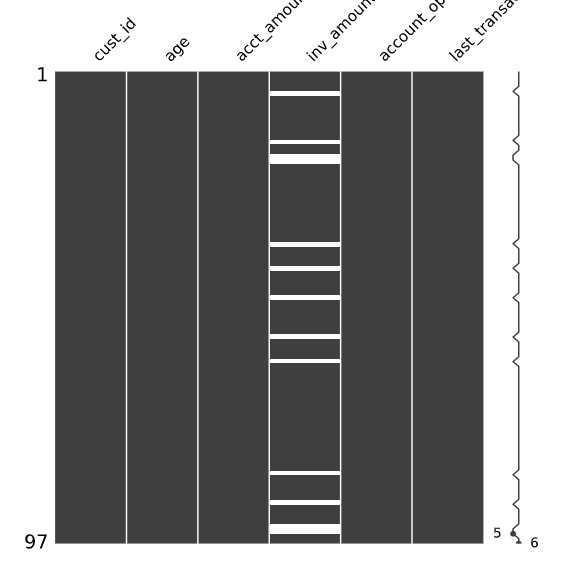


* Isolate the values of banking missing values of inv_amount into missing_investors and with non-missing inv_amount values into investors.

```
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]

investors = banking[~banking['inv_amount'].isna()]
```
```
cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64
```
* Now that you've isolated banking into investors and missing_investors, use the .describe() method on both of these DataFrames in the console to understand whether there are structural differences between them. What do you think is going on?
>The inv_amount is missing only for young customers, since the average age in missing_investors is 22 and the maximum age is 25.

* Sort the banking DataFrame by the age column and plot the missingness matrix of banking_sorted.

```
# Sort banking by age and visualize
banking_sorted = banking.sort_values(by = 'age')
msno.matrix(banking_sorted)
plt.show()
```
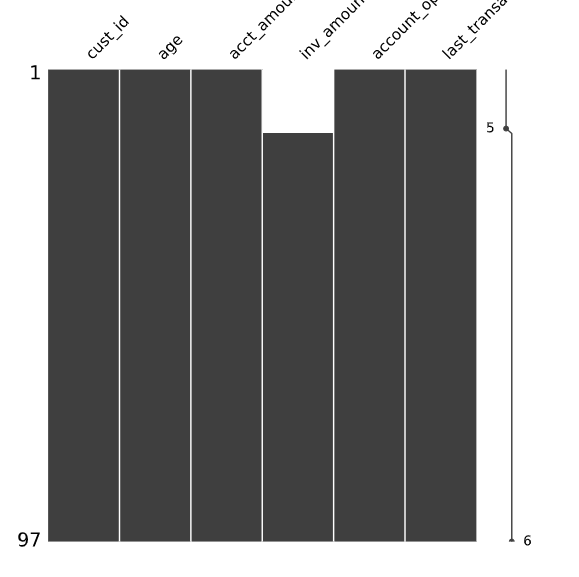

**Dropping rows with missing values and imputing missing values with .fillna()**

* Use .dropna() to drop missing values of the cust_id column in banking and store the results in banking_fullid.
* Compute the estimated acct_amount of banking_fullid knowing that acct_amount is usually inv_amount * 5 and assign the results to acct_imp.
* Impute the missing values of acct_amount in banking_fullid with the newly created acct_imp using .fillna().

```
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())
```



## Record Linkage

When there is to much data for remapping, we should use record linkage to unify the values with string similarity. 

